In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
file1 = "E:/WowAI/Song lyrics datasets/csv/ArianaGrande.csv"   
file2 = "E:/WowAI/Song lyrics datasets/csv/Beyonce.csv"
file3 = "E:/WowAI/Song lyrics datasets/csv/BillieEilish.csv"
file4 = "E:/WowAI/Song lyrics datasets/csv/BTS.csv"
file5 = "E:/WowAI/Song lyrics datasets/csv/CardiB.csv"
file6 = "E:/WowAI/Song lyrics datasets/csv/CharliePuth.csv"
file7 = "E:/WowAI/Song lyrics datasets/csv/ColdPlay.csv"
file8 = "E:/WowAI/Song lyrics datasets/csv/Drake.csv"
file9 = "E:/WowAI/Song lyrics datasets/csv/DuaLipa.csv"
file10 = "E:/WowAI/Song lyrics datasets/csv/EdSheeran.csv"
file11 = "E:/WowAI/Song lyrics datasets/csv/Eminem.csv"
file12 = "E:/WowAI/Song lyrics datasets/csv/JustinBieber.csv"
file13 = "E:/WowAI/Song lyrics datasets/csv/KatyPerry.csv"
file14 = "E:/WowAI/Song lyrics datasets/csv/Khalid.csv"
file15 = "E:/WowAI/Song lyrics datasets/csv/LadyGaga.csv"
file16 = "E:/WowAI/Song lyrics datasets/csv/Maroon5.csv"
file17 = "E:/WowAI/Song lyrics datasets/csv/NickiMinaj.csv"
file18 = "E:/WowAI/Song lyrics datasets/csv/PostMalone.csv"
file19 = "E:/WowAI/Song lyrics datasets/csv/Rihanna.csv"
file20 = "E:/WowAI/Song lyrics datasets/csv/SelenaGomez.csv"
file21 = "E:/WowAI/Song lyrics datasets/csv/TaylorSwift.csv"

In [3]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)
df7 = pd.read_csv(file7)
df8 = pd.read_csv(file8)
df9 = pd.read_csv(file9)
df10 = pd.read_csv(file10)
df11 = pd.read_csv(file11)
df12 = pd.read_csv(file12)
df13 = pd.read_csv(file13)
df14 = pd.read_csv(file14)
df15 = pd.read_csv(file15)
df16 = pd.read_csv(file16)
df17 = pd.read_csv(file17)
df18 = pd.read_csv(file18)
df19 = pd.read_csv(file19)
df20 = pd.read_csv(file20)
df21 = pd.read_csv(file21)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, 
                df13, df14, df15, df16, df17, df18, df19, df20, df21])
df

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,NaN
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,NaN
...,...,...,...,...,...,...,...
474,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,Live From Clear Channel Stripped 2008,2008-06-28,drew looks at me i fake a smile so he won't se...,2008.0,474.0
475,Taylor Swift,Evermore [Forward],NaN,2020-12-11,to put it plainly we just couldnt stop writing...,2020.0,475.0
476,Taylor Swift,Welcome Back Grunwald,NaN,NaN,turn wycd on you're on your grunwald back from...,NaN,476.0
477,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020-12-11,zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,477.0


In [4]:
df['Artist'].unique()

array(['Ariana Grande', 'Beyoncé', 'Billie Eilish', 'BTS (방탄소년단)',
       'Cardi B', 'Charlie Puth', 'Coldplay', 'Drake', 'Dua Lipa',
       'Ed Sheeran', 'Eminem', 'Justin Bieber', 'Katy Perry', 'Khalid',
       'Lady Gaga', 'Maroon 5', 'Nicki Minaj', 'Post Malone', 'Rihanna',
       'Selena Gomez', 'Taylor Swift'], dtype=object)

In [5]:
genre_mapping = {
    'Ariana Grande': 'Pop',
    'Beyoncé': 'R&B Pop',
    'Billie Eilish': 'Alternative Indie',
    'BTS (방탄소년단)': 'KPop',
    'Cardi B': 'Hip Hop',
    'Charlie Puth': 'Pop',
    'Coldplay': 'Alternative Indie',
    'Drake': 'Hip Hop',
    'Dua Lipa': 'Pop',
    'Ed Sheeran': 'Pop',
    'Eminem': 'Hip Hop',
    'Justin Bieber': 'Pop',
    'Katy Perry': 'Pop',
    'Khalid': 'R&B Pop',
    'Lady Gaga': 'Pop',
    'Maroon 5': 'Pop Rock',
    'Nicki Minaj': 'Hip Hop',
    'Post Malone': 'Hip Hop',
    'Rihanna': 'R&B Pop',
    'Selena Gomez': 'Pop',
    'Taylor Swift': 'Pop Country'
}

df['Genre'] = df['Artist'].apply(lambda x: f"Genre {genre_mapping.get(x, 'Unknown')}")
df

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0,Genre
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN,Genre Pop
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN,Genre Pop
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN,Genre Pop
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,NaN,Genre Pop
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,NaN,Genre Pop
...,...,...,...,...,...,...,...,...
474,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,Live From Clear Channel Stripped 2008,2008-06-28,drew looks at me i fake a smile so he won't se...,2008.0,474.0,Genre Pop Country
475,Taylor Swift,Evermore [Forward],NaN,2020-12-11,to put it plainly we just couldnt stop writing...,2020.0,475.0,Genre Pop Country
476,Taylor Swift,Welcome Back Grunwald,NaN,NaN,turn wycd on you're on your grunwald back from...,NaN,476.0,Genre Pop Country
477,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020-12-11,zwrotka siedzę i patrzę jak czytasz z głową p...,2020.0,477.0,Genre Pop Country


In [6]:
df = df.drop(columns = ['Album','Date', 'Year', 'Unnamed: 0'])
df

,Artist,Title,Lyric,Genre
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,Genre Pop
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,Genre Pop
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,Genre Pop
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,Genre Pop
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,Genre Pop
...,...,...,...,...
474,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,Genre Pop Country
475,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,Genre Pop Country
476,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...,Genre Pop Country
477,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,Genre Pop Country


C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48169 missing from current

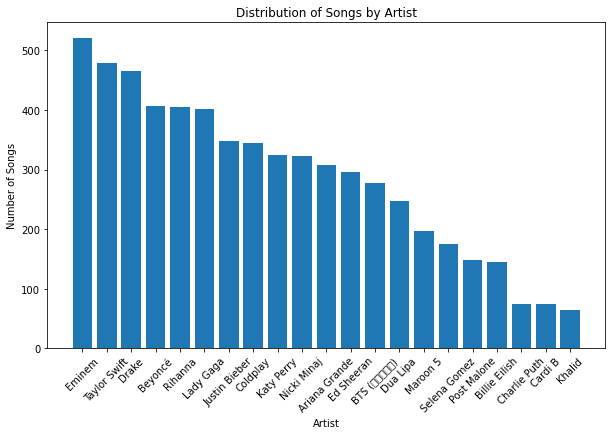

In [7]:
artist_counts = df['Artist'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(artist_counts.index, artist_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Artist')
plt.xticks(rotation=45)
plt.show()


In [8]:
df.isnull().sum()

Artist     0
Title      0
Lyric     46
Genre      0
dtype: int64

In [9]:
df[df['Lyric'].isnull()]

,Artist,Title,Lyric,Genre
202,BTS (방탄소년단),Interlude,NaN,Genre KPop
219,BTS (방탄소년단),Friends (Hoseok Theme),NaN,Genre KPop
227,BTS (방탄소년단),Captain (Namjun Theme),NaN,Genre KPop
228,BTS (방탄소년단),Cake Waltz (Jimin Theme),NaN,Genre KPop
236,BTS (방탄소년단),Flying (Taehyung Theme),NaN,Genre KPop
242,BTS (방탄소년단),Not Alone (Jeongguk Theme),NaN,Genre KPop
248,BTS (방탄소년단),Shine (Yunki Theme),NaN,Genre KPop
254,BTS (방탄소년단),Wish (Seok Jin Theme),NaN,Genre KPop
68,Coldplay,Sunrise,NaN,Genre Alternative Indie
115,Coldplay,Mylo Xyloto,NaN,Genre Alternative Indie


In [10]:
df = df.dropna()
df.isnull().sum()

Artist    0
Title     0
Lyric     0
Genre     0
dtype: int64

In [11]:
duplicates = df[df['Lyric'].duplicated()]
duplicates

,Artist,Title,Lyric,Genre
190,Ariana Grande,New York Live,lyrics for this song have yet to be released p...,Genre Pop
229,Ariana Grande,My Sugar Coated Yeti,lyrics for this song have yet to be released p...,Genre Pop
240,Ariana Grande,Confused,lyrics for this song have yet to be released p...,Genre Pop
241,Ariana Grande,Topless,lyrics for this song have yet to be released p...,Genre Pop
249,Ariana Grande,Butterfly*,lyrics for this song have yet to be released p...,Genre Pop
...,...,...,...,...
427,Taylor Swift,Don’t You*,lyrics for this song have yet to be released p...,Genre Pop Country
429,Taylor Swift,This One’s Different*,lyrics for this song have yet to be released p...,Genre Pop Country
432,Taylor Swift,Someone Just Told Me*,lyrics for this song have yet to be released p...,Genre Pop Country
439,Taylor Swift,Going Louder Folks*,lyrics for this song have yet to be released p...,Genre Pop Country


In [12]:
merged1 = df.merge(duplicates, indicator=True, how='left')
df = merged1[merged1['_merge'] == 'left_only'].drop(columns='_merge')
df

,Artist,Title,Lyric,Genre
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,Genre Pop
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,Genre Pop
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,Genre Pop
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,Genre Pop
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,Genre Pop
...,...,...,...,...
5976,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,Genre Pop Country
5977,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,Genre Pop Country
5978,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...,Genre Pop Country
5979,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,Genre Pop Country


In [13]:
for words in df.columns:
    df['lyrics_word'] = df['Lyric'].str.split().apply(len)
df

,Artist,Title,Lyric,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,Genre Pop,500
...,...,...,...,...,...
5976,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,Genre Pop Country,287
5977,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,Genre Pop Country,142
5978,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...,Genre Pop Country,60
5979,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,Genre Pop Country,301


In [14]:
c = 0
indexes = []
for i, x in enumerate(df['lyrics_word']):
    if x < 20:
        indexes.append(i)
        c += 1

print(indexes)
print(c)


[145, 148, 168, 185, 225, 238, 253, 257, 275, 279, 282, 285, 287, 292, 294, 489, 565, 604, 611, 633, 636, 669, 672, 736, 738, 742, 747, 751, 1007, 1028, 1029, 1056, 1136, 1141, 1315, 1377, 1437, 1860, 1950, 1969, 1970, 1979, 1980, 1982, 1999, 2000, 2001, 2004, 2008, 2083, 2102, 2103, 2137, 2143, 2200, 2209, 2211, 2214, 2495, 2497, 2778, 2956, 2981, 2989, 2996, 3001, 3006, 3009, 3012, 3014, 3017, 3254, 3280, 3321, 3327, 3516, 3537, 3569, 3574, 3582, 3593, 3594, 3885, 3890, 3909, 3911, 3912, 3919, 3924, 3925, 3928, 3950, 3951, 3959, 3990, 4004, 4028, 4032, 4033, 4426, 4453, 4466, 4472, 4496, 4503, 4510, 4515, 4517, 4518, 4646, 4861, 4916, 4995, 5095, 5125, 5142, 5163, 5168, 5173, 5178, 5410, 5499, 5571]
123


In [15]:
x = df.iloc[indexes]
x

,Artist,Title,Lyric,Genre,lyrics_word
145,Ariana Grande,​you,lyrics for this song have yet to be released p...,Genre Pop,18
148,Ariana Grande,I’ve Heard It Both Ways,lyrics will be available upon release stay tuned,Genre Pop,8
168,Ariana Grande,The Way It Is,tba,Genre Pop,1
185,Ariana Grande,Called My Mind*,lyrics for this song have yet to be released p...,Genre Pop,18
226,Ariana Grande,Woman Races*,ariii kim,Genre Pop,2
...,...,...,...,...,...
5480,Selena Gomez,"NBA (feat. Mau y Ricky, Lali)",letra de nba mau y ricky lali,Genre Pop,7
5485,Selena Gomez,Top Secrets,got some top secrets am text me back baby yo...,Genre Pop,13
5723,Taylor Swift,Had Nothing But a Time We Never Had*,lyrics available upon release stay tuned,Genre Pop Country,6
5815,Taylor Swift,All of the Girls,lyrics from taylor's inner circle a heart is d...,Genre Pop Country,17


In [16]:
merged = df.merge(x, indicator=True, how='left')
df = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
df

,Artist,Title,Lyric,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,Genre Pop,500
...,...,...,...,...,...
5635,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,Genre Pop Country,287
5636,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,Genre Pop Country,142
5637,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...,Genre Pop Country,60
5638,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,Genre Pop Country,301


In [17]:
df['lyrics_word'].describe()

count    5517.000000
mean      401.054377
std       297.702257
min        20.000000
25%       235.000000
50%       348.000000
75%       496.000000
max      5768.000000
Name: lyrics_word, dtype: float64

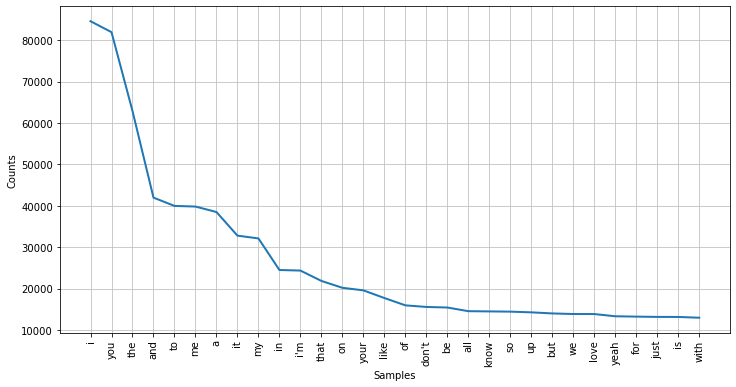

In [18]:
all_lyrics = ' '.join(df['Lyric'])
tokens = all_lyrics.split()
freq_dist = FreqDist(tokens)
plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.show()

In [19]:
import re

def strip_html(text):
    return re.sub(r'<.*?>', '', text)                  

df['Lyric'] = df['Lyric'].apply(strip_html)
df

,Artist,Title,Lyric,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,Genre Pop,500
...,...,...,...,...,...
5635,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,Genre Pop Country,287
5636,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,Genre Pop Country,142
5637,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...,Genre Pop Country,60
5638,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,Genre Pop Country,301


In [20]:
def convert_to_lowercase(text):
    return text.lower()

df['Lyric'] = df['Lyric'].apply(convert_to_lowercase)
df

,Artist,Title,Lyric,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...,Genre Pop,500
...,...,...,...,...,...
5635,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...,Genre Pop Country,287
5636,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,Genre Pop Country,142
5637,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...,Genre Pop Country,60
5638,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...,Genre Pop Country,301


In [21]:
import re

def special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
                  
df['Lyric'] = df['Lyric'].apply(special_chars)
df

,Artist,Title,Lyric,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought id end up with sean but he wasnt a mat...,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffanys and bottles of bubb...,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive been here all n...,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now im in a state of mind i wanna be in ...,Genre Pop,500
...,...,...,...,...,...
5635,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he wont see...,Genre Pop Country,287
5636,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,Genre Pop Country,142
5637,Taylor Swift,Welcome Back Grunwald,turn wycd on youre on your grunwald back from ...,Genre Pop Country,60
5638,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedz i patrz jak czytasz z gow pochy...,Genre Pop Country,301


In [22]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
def tokenizewords(text):
    return ' '.join(word_tokenize(text))

                  
df['Lyric'] = df['Lyric'].apply(tokenizewords)
df

,Artist,Title,Lyric,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought id end up with sean but he wasnt a mat...,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast at tiffanys and bottles of bubb...,Genre Pop,490
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive been here all ni...,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right now im in a state of mind i wan na be in...,Genre Pop,500
...,...,...,...,...,...
5635,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he wont see...,Genre Pop Country,287
5636,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...,Genre Pop Country,142
5637,Taylor Swift,Welcome Back Grunwald,turn wycd on youre on your grunwald back from ...,Genre Pop Country,60
5638,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedz i patrz jak czytasz z gow pochyl...,Genre Pop Country,301


In [23]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in sw_list])

                  
df['Lyric'] = df['Lyric'].apply(remove_stopwords)
df

,Artist,Title,Lyric,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought id end sean wasnt match wrote songs ri...,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast tiffanys bottles bubbles girls ...,Genre Pop,490
2,Ariana Grande,​God is a woman,love move love touch one said done youll belie...,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive night ariana ive...,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right im state mind wan na like time aint got ...,Genre Pop,500
...,...,...,...,...,...
5635,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks fake smile wont see want im needing...,Genre Pop Country,287
5636,Taylor Swift,Evermore [Forward],put plainly couldnt stop writing songs try put...,Genre Pop Country,142
5637,Taylor Swift,Welcome Back Grunwald,turn wycd youre grunwald back amazon ah huh hu...,Genre Pop Country,60
5638,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedz patrz jak czytasz z gow pochylon...,Genre Pop Country,301


In [24]:
df.iloc[0]

Artist                                             Ariana Grande
Title                                             ​thank u, next
Lyric          thought id end sean wasnt match wrote songs ri...
Genre                                                  Genre Pop
lyrics_word                                                  463
Name: 0, dtype: object

In [25]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemm = WordNetLemmatizer()
def lemmatizewords(text):
    return ' '.join([lemm.lemmatize(word) for word in text.split()])

df['Lyric'] = df['Lyric'].apply(lemmatizewords)
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Artist,Title,Lyric,Genre,lyrics_word
0,Ariana Grande,"​thank u, next",thought id end sean wasnt match wrote song ric...,Genre Pop,463
1,Ariana Grande,7 rings,yeah breakfast tiffany bottle bubble girl tatt...,Genre Pop,490
2,Ariana Grande,​God is a woman,love move love touch one said done youll belie...,Genre Pop,439
3,Ariana Grande,Side To Side,ariana grande nicki minaj ive night ariana ive...,Genre Pop,551
4,Ariana Grande,​​no tears left to cry,right im state mind wan na like time aint got ...,Genre Pop,500
...,...,...,...,...,...
5635,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew look fake smile wont see want im needing ...,Genre Pop Country,287
5636,Taylor Swift,Evermore [Forward],put plainly couldnt stop writing song try put ...,Genre Pop Country,142
5637,Taylor Swift,Welcome Back Grunwald,turn wycd youre grunwald back amazon ah huh hu...,Genre Pop Country,60
5638,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedz patrz jak czytasz z gow pochylon...,Genre Pop Country,301


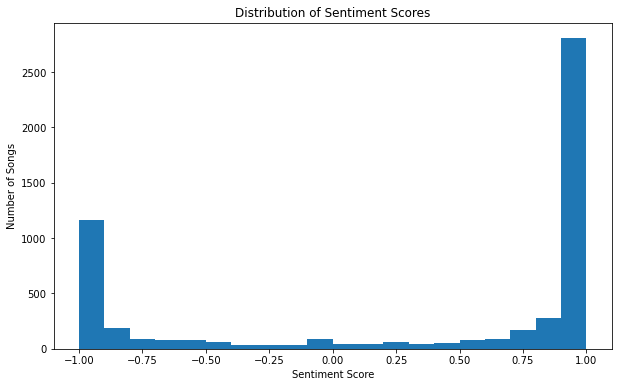

In [26]:
sia = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Lyric'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment_Score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Songs')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [27]:
df['Lyric'].describe()

count                                                  5517
unique                                                 5462
top       look star look shine everything yeah yellow ca...
freq                                                      4
Name: Lyric, dtype: object

In [28]:
df_test1 = df.sample(100)
df_test2 = df.tail(3000)
df_test1

,Artist,Title,Lyric,Genre,lyrics_word,Sentiment_Score
131,Ariana Grande,Ain’t About What You Got,yeah heard couple bad thing used think gossip ...,Genre Pop,391,0.7630
4376,Nicki Minaj,Sticks In My Bun,hook done put stick bun recognize come im dmc ...,Genre Hip Hop,244,0.8093
1560,Drake,From Time,jhen aiko whats minute since kicked youve caug...,Genre Hip Hop,755,0.9943
3575,Katy Perry,I Kissed a Girl (Dr. Luke and Benny Blanco Ext...,felt wrong felt right dont mean im love tonigh...,Genre Pop,161,0.9965
1486,Coldplay,Midnight (Live in Buenos Aires),darkness dawn darkness dawn leave light light ...,Genre Alternative Indie,24,-0.5267
...,...,...,...,...,...,...
5308,Taylor Swift,The Lucky One,new town made name angel city chasing fortune ...,Genre Pop Country,338,0.9968
2491,Ed Sheeran,Make You Feel My Love (Adele Cover),rain blowing face whole world case could offer...,Genre Pop,198,0.9916
4174,Maroon 5,Is Anybody Out There,adam levine wont let anyone hurt ill stop try ...,Genre Pop Rock,287,0.7163
4357,Nicki Minaj,Roman’s Revenge (Busta Rhymes Remix),sample courtesy scenario tribe called quest le...,Genre Hip Hop,791,0.7888


In [29]:
df_test2

,Artist,Title,Lyric,Genre,lyrics_word,Sentiment_Score
2577,Eminem,Role Model,okay im going attempt drown try home like mic ...,Genre Hip Hop,688,-0.9957
2578,Eminem,Premonition (Intro),eminem yeah guess huh think obvious aint never...,Genre Hip Hop,579,-0.9968
2579,Eminem,Offended,eminem claim get knocked cop youll give em eve...,Genre Hip Hop,1378,-0.9959
2580,Eminem,Guilty Conscience,mark avery eddie meet eddie year old fed life ...,Genre Hip Hop,713,-0.9986
2581,Eminem,Brainless,eminem full line chainsaw eminem eminem eminem...,Genre Hip Hop,991,-0.9984
...,...,...,...,...,...,...
5635,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew look fake smile wont see want im needing ...,Genre Pop Country,287,0.9712
5636,Taylor Swift,Evermore [Forward],put plainly couldnt stop writing song try put ...,Genre Pop Country,142,0.9441
5637,Taylor Swift,Welcome Back Grunwald,turn wycd youre grunwald back amazon ah huh hu...,Genre Pop Country,60,0.6361
5638,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedz patrz jak czytasz z gow pochylon...,Genre Pop Country,301,0.9001


In [30]:
lyrics = df_test1['Genre'].values + df_test1['Lyric'].values
lyrics

array(['Genre Popyeah heard couple bad thing used think gossip shouldnt believe bae going around thinking baby oh yeah boy taking sugar every lady oh yeah pre oh went yeah went way long oh baby aint got aint got someone sexy damn repulsive baby aint got lady hit saying yeah yeah yeah yeah better open eye girl boy playing know oh yeah even though outside youre looking tasty oooh yeah well baby boy inside youre nothing shady na na na na na na pre boy went yeah went way long oh baby aint got aint got someone sexy damn repulsive baby aint got hook aint na na na na na na na na na na na na na na aint na na na na na na na na na na na na na na went way long ooh baby oh baby hey went way long oooooooooh aint got aint got someone sexy damn repulsive baby aint got na na na na na na na na na na na na na na na na na na yeah',
       'Genre Hip Hophook done put stick bun recognize come im dmc like run listen mammi im muhfuckin one dont like like flow booked show might go nigga said didnt pole ho dam

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding

In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_test1['Lyric'])
total_words = len(tokenizer.word_index) + 1

In [33]:
input_sequences = []
target_sequences = []
for sequence in tokenizer.texts_to_sequences(df_test1['Lyric']):
    for i in range(1, len(sequence)):
        input_sequences.append(sequence[:i])
        target_sequences.append(sequence[i])


In [34]:
# Pad sequences
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
target_sequences = np.array(target_sequences)  # Convert target_sequences to numpy array


In [37]:
# Create the GRU model
modelGRU = Sequential()
modelGRU.add(Embedding(total_words, 100, input_length=max_sequence_length))
modelGRU.add(GRU(150))
modelGRU.add(Dense(total_words, activation='softmax'))
modelGRU.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [38]:
# Fit the model
modelGRU.fit(input_sequences, target_sequences, epochs=10, verbose=1)

Epoch 1/10
613/613 [==============================] - 1520s 2s/step - loss: 7.0326
Epoch 2/10
613/613 [==============================] - 1536s 3s/step - loss: 6.2914
Epoch 3/10
613/613 [==============================] - 1470s 2s/step - loss: 5.5635
Epoch 4/10
613/613 [==============================] - 1447s 2s/step - loss: 4.7952
Epoch 5/10
613/613 [==============================] - 1457s 2s/step - loss: 4.0659
Epoch 6/10
613/613 [==============================] - 1463s 2s/step - loss: 3.4162
Epoch 7/10
613/613 [==============================] - 1454s 2s/step - loss: 2.8578
Epoch 8/10
613/613 [==============================] - 1444s 2s/step - loss: 2.3797
Epoch 9/10
613/613 [==============================] - 1430s 2s/step - loss: 1.9846
Epoch 10/10
613/613 [==============================] - 1459s 2s/step - loss: 1.6628


In [40]:
def complete_this_song(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length, padding='pre')

        predicted_probs = modelGRU.predict(token_list)[0]

        # Get indices that are in tokenizer's word_index
        valid_indices = [idx for word, idx in tokenizer.word_index.items() if idx < len(predicted_probs)]

        # Sample from the predicted probabilities
        output_word_index = np.random.choice(valid_indices, p=predicted_probs[valid_indices]/np.sum(predicted_probs[valid_indices]))
        output_word = tokenizer.index_word[output_word_index]

        seed_text += " " + output_word

    return seed_text

generated_lyrics = complete_this_song('I am thinking of you', 50)
print(generated_lyrics)


1/1 [==============================] - 0s 38ms/step
I am thinking of you town go hand hand cant keep tell everything wont ya ill much dont called tear keep hand air nothing love know holding take nothing else matter eye time say youd deserve bottom shorty mediocre door music cause make dream fuckin way im never cared im ice keep hand love take


In [41]:
import matplotlib.pyplot as plt
import random
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

def calculate_bleu_score(reference, generated):
    reference = [reference.split()]
    generated = generated.split()
    return sentence_bleu(reference, generated)

def calculate_meteor_score(reference, generated):
    return meteor_score([reference], generated)

reference_lyrics = random.choice(df['Lyric'])

In [42]:
bleu_score = calculate_bleu_score(reference_lyrics, generated_lyrics)
meteor_score = calculate_meteor_score(reference_lyrics, generated_lyrics)

print("Generated Lyric:")
print(generated_lyrics)
print("BLEU Score:", bleu_score)
print("METEOR Score:", meteor_score)

Generated Lyric:
I am thinking of you town go hand hand cant keep tell everything wont ya ill much dont called tear keep hand air nothing love know holding take nothing else matter eye time say youd deserve bottom shorty mediocre door music cause make dream fuckin way im never cared im ice keep hand love take
BLEU Score: 1.1285335991545969e-235
METEOR Score: 0.032560812104960736


C:\Users\ASUS\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\ASUS\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\ASUS\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.

In [43]:
import matplotlib.pyplot as plt
import random
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

def calculate_bleu_score(reference, generated):
    reference = [reference.split()]
    generated = generated.split()
    return sentence_bleu(reference, generated)

def calculate_meteor_score(reference, generated):
    return meteor_score([reference], generated)

num_lyrics_to_generate = 5

reference_lyrics = random.choice(df['Lyric'])

bleu_scores = []
meteor_scores = []
generated_lyrics = []

for _ in range(num_lyrics_to_generate):
    generated_lyrics = complete_this_song('I am happy', 50)

    bleu_score = calculate_bleu_score(reference_lyrics, generated_lyrics)
    meteor_score_value = calculate_meteor_score(reference_lyrics, generated_lyrics)

    bleu_scores.append(bleu_score)
    meteor_scores.append(meteor_score_value)

    print("Generated Lyric:")
    print(generated_lyrics)
    print("BLEU Score:", bleu_score)
    print("METEOR Score:", meteor_score_value)
    print()



1/1 [==============================] - 0s 32ms/step
Generated Lyric:
I am happy incredible run party made soul proof know learned hannukah camera miss came gut fear high life like high life see pre sia always caus like smother wrong feel late terrible facade gin wont come listen high youre sorry know oh cut knew dont give fuck admit im gon make cutting
BLEU Score: 1.3780221823373085e-232
METEOR Score: 0.06353240152477763

1/1 [==============================] - 0s 31ms/step
Generated Lyric:
I am happy incredible head sell alarm yous outta shopper jewelry yeah said oh oh oh oh mmm oh oh oh take blood mission look show showed saw take time apart people switchin guessing atmosphere like bible chuck scene know know like chainz goddamn idiot came along good throw jungkook selfish jimin beat
BLEU Score: 1.0700967254762093e-232
METEOR Score: 0.03811944091486658

1/1 [==============================] - 0s 29ms/step
Generated Lyric:
I am happy emostions collide promise pre low wont hear think yea

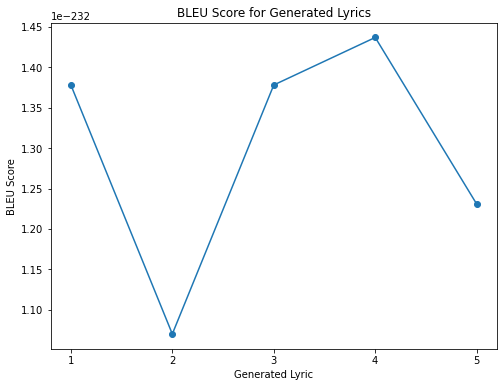

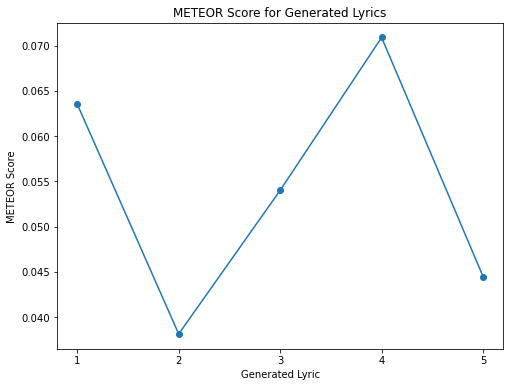

In [44]:
# Plot BLEU scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_lyrics_to_generate+1), bleu_scores, marker='o')
plt.xlabel('Generated Lyric')
plt.ylabel('BLEU Score')
plt.title('BLEU Score for Generated Lyrics')
plt.xticks(np.arange(1, num_lyrics_to_generate+1))
plt.show()

# Plot METEOR scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_lyrics_to_generate+1), meteor_scores, marker='o')
plt.xlabel('Generated Lyric')
plt.ylabel('METEOR Score')
plt.title('METEOR Score for Generated Lyrics')
plt.xticks(np.arange(1, num_lyrics_to_generate+1))
plt.show()

In [ ]:
import numpy as np

# Sentiment score statistics
sentiment_scores = df['Sentiment_Score']

# Calculate statistics
mean_score = np.mean(sentiment_scores)
median_score = np.median(sentiment_scores)
min_score = np.min(sentiment_scores)
max_score = np.max(sentiment_scores)
std_score = np.std(sentiment_scores)

print("Sentiment Score Statistics:")
print("Mean Score:", mean_score)
print("Median Score:", median_score)
print("Minimum Score:", min_score)
print("Maximum Score:", max_score)
print("Standard Deviation:", std_score)

# Plotting the sentiment score distribution
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Songs')
plt.title('Distribution of Sentiment Scores')
plt.show()
